# Código do dashboard
## Autores: Agnaldo B. Júnior e Pedro H. C. dos Santos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import psycopg2

/home/pedro/anaconda3/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### Questão 5a:

In [2]:
def getHelpfulReviews(asin, con):
    cursor = con.cursor()
    cursor.execute('''select * from (
                  (select * from products join reviews r on products.asin = r.product_asin where asin='{}' order by helpful DESC , rating DESC LIMIT 5)
                  union all
                  (select * from products join reviews r on products.asin = r.product_asin where asin='{}' order by rating DESC ,helpful DESC  LIMIT 5)
              ) result;'''.format(asin,asin))
    rows = cursor.fetchall()
    cursor.close()
    con.close()
    return rows

### Questao 5b:

In [3]:
def getSimilarsWithMostSalesrank(asin, con):
    cursor = con.cursor()
    cursor.execute('''select * from (similars JOIN products ON similars.asin_1 = products.asin) AS result
    JOIN products ON result.asin_2 = products.asin  where asin_1='{}' and result.salesrank < products.salesrank;'''.format(asin))
    rows = cursor.fetchall()
    cursor.close()
    con.close()
    return rows
# getSimilarsWithMostSalesrank('0738700797')

### Questao 5c:

In [4]:
def getProductAvgTimeline(asin, con):
    cursor = con.cursor()
    cursor.execute('''select date,rating from products join reviews r on products.asin = r.product_asin where asin='{}' order by date;'''.format(asin))
    rows = cursor.fetchall()
    cursor.close()
    con.close()
    ratings = []
    for index in range(0,len(rows)):
        avg = 0
        for j in range(0,index+1):
            avg += rows[j][1]
        avg = avg/(index+1)
        ratings.append((rows[index][0],avg))
    return ratings
# getProductAvgTimeline('0738700797')

### Questao 5d:

In [5]:
def getTop10ProductsOfEachGroup(con):
    cursor = con.cursor()
    cursor.execute('''SELECT * FROM (
                SELECT *, rank() OVER (
                    PARTITION BY products."group"
                    ORDER BY products.salesrank DESC
                )
                FROM products
                WHERE salesrank notnull
                ) jobs WHERE  RANK <=10;''')
    rows = cursor.fetchall()
    cursor.close()
    con.close()
    return rows
# getTop10ProductsOfEachGroup()

### Questao 5e:

In [6]:
def getTop10ProductsWithMostRatingAVG(con):
    cursor = con.cursor()
    cursor.execute('''SELECT asin,title,avg(helpful) FROM products join reviews r on products.asin = r.product_asin 
    GROUP BY (asin,title) order by avg(helpful) DESC LIMIT 10;''')
    rows = cursor.fetchall()
    cursor.close()
    con.close()
    return rows
# getTop10ProductsWithMostRatingAVG()

### Questao 5f:

In [7]:
def getTop5CategoriesWithMostRating(con):
    cursor = con.cursor()
    cursor.execute('''select category_id,name,avg
        from (
         SELECT category_id, avg(helpful)
         FROM products
                  join reviews r on products.asin = r.product_asin
                  join product_category pc on products.asin = pc.product_asin
                  join categories c on pc.category_id = c.id
         group by (category_id)
         order by avg(helpful) desc
         limit 5
        ) result join categories on category_id=id;''')
    rows = cursor.fetchall()
    cursor.close()
    con.close()
    return rows
# getTop5CategoriesWithMostRating()

### Questao 5g:

In [8]:
def get10CustomersWithMostReviewsForEachGroup(con):
    cursor = con.cursor()
    cursor.execute('''SELECT customer,"group",count FROM (
                SELECT *, row_number()  OVER (
                    PARTITION BY "group"
                    ORDER BY count DESC
                )
                FROM ( SELECT count(customer),customer,"group" FROM reviews,products WHERE product_asin = asin GROUP BY customer,"group" ORDER BY "group",count(customer) DESC) xuei
            ) jobs WHERE row_number <= 10;''')
    rows = cursor.fetchall()
    cursor.close()
    con.close()
    return rows
# get10CustomersWithMostReviewsForEachGroup()

In [9]:
def create_connection(user, password, host, port, dbname):
    con = psycopg2.connect( user = user,
                        password = password,
                        host = host,
                        port = port,
                        dbname = dbname)
    return con

In [10]:
# print("Insira os parâmetros da conexão: Usuário, senha, endereço do servidor, porta, nome da database")
# print("Porta padrão é 5432")
# user = input("Usuário")
# password = input("Senha")
# host = input("Endereço")
# port = input("Porta")
# dbname = input("Nome da database")
user = "postgres"
password = "postgres"
host = "localhost"
port = "5432"
dbname = "amazon"

## Resultados:

In [79]:
from matplotlib.pyplot import figure

In [159]:
#5 a)
print("\nResultados da query 5 - a)")
con = create_connection(user,password,host,port,dbname)
result = getHelpfulReviews('0738700797', con)
print("Comentários mais úteis e com maior avaliação e mais úteis com menos avaliação:")
for product in result:
    print("| Customer: {} | Rating: {} | ASIN: {} |\n".format(product[7],product[8],product[1]))
    
input("Pressiona qualquer tecla para a próxima query")

Comentários mais úteis e com maior avaliação e mais úteis com menos avaliação:
| Customer: A2P6KAWXJ16234 | Rating: 4 | ASIN: 0738700797 |

| Customer: A1CP26N8RHYVVO | Rating: 1 | ASIN: 0738700797 |

| Customer: A13SG9ACZ9O5IM | Rating: 5 | ASIN: 0738700797 |

| Customer: A1GIL64QK68WKL | Rating: 5 | ASIN: 0738700797 |

| Customer: A3GO7UV9XX14D8 | Rating: 4 | ASIN: 0738700797 |

| Customer: A1GIL64QK68WKL | Rating: 5 | ASIN: 0738700797 |

| Customer: A13SG9ACZ9O5IM | Rating: 5 | ASIN: 0738700797 |

| Customer: A3IGHTES8ME05L | Rating: 5 | ASIN: 0738700797 |

| Customer: AEOBOF2ONQJWV | Rating: 5 | ASIN: 0738700797 |

| Customer: A11NCO6YTE4BTJ | Rating: 5 | ASIN: 0738700797 |



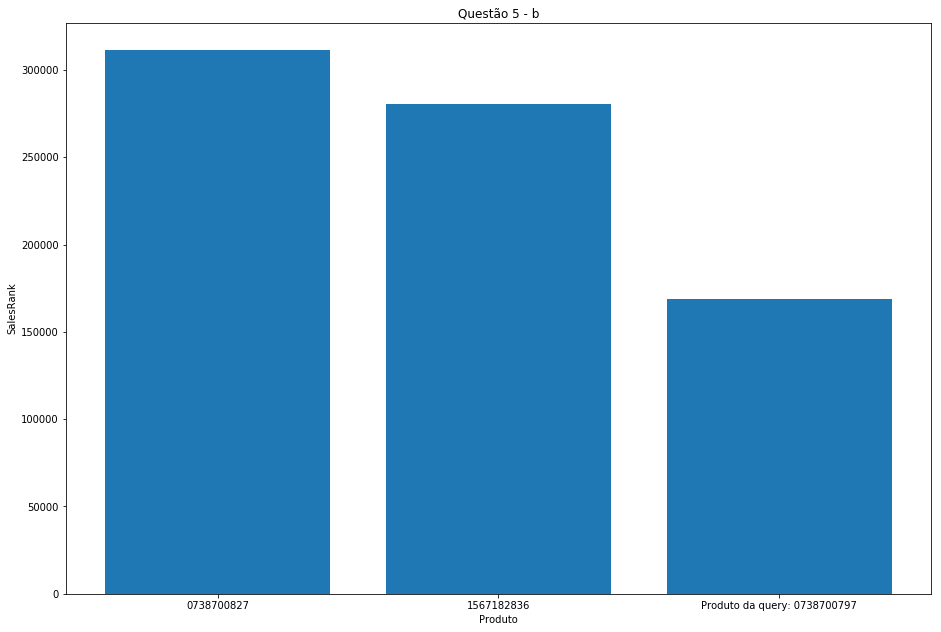

In [175]:
#5 b)
con = create_connection(user,password,host,port,dbname)
result = getSimilarsWithMostSalesrank('0738700797',con)

result = [('0738700797', '0738700827', 2, '0738700797', 'Candlemas: Feast of Flames', 'Book', 168596, 454888, '0738700827', 'Ostara: Customs, Spells & Rituals for the Rites of Spring', 'Book', 311254), 
('0738700797', '1567182836', 2, '0738700797', 'Candlemas: Feast of Flames', 'Book', 168596, 411179, '1567182836', 'Beltane: Springtime Rituals, Lore and Celebration', 'Book', 280541)]

axis = np.array([([x[8],x[-1]]) for x in result])
x = [x[0] for x in axis]
x.append("Produto da query: {}".format(result[0][0]))
y = [int(y[1]) for y in axis]
y.append(result[0][6])
plt.xlabel("Produto")
plt.ylabel("SalesRank")
plt.title("Questão 5 - b")
plt.bar(x,y)
fig = plt.gcf()
fig.set_size_inches(15.5, 10.5, forward=True)
plt.show()
input("Pressiona qualquer tecla para a próxima query")

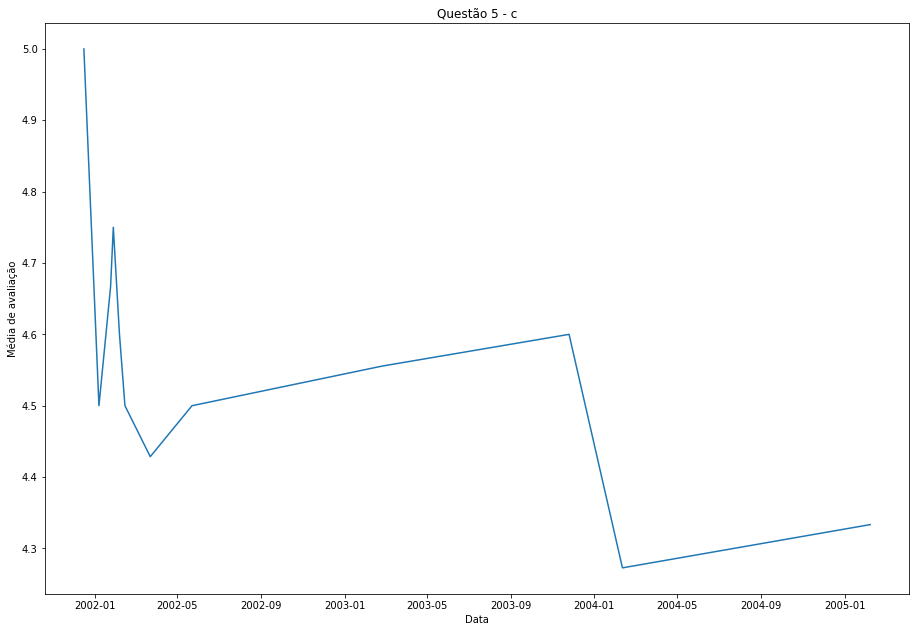

In [170]:
#5 c)
con = create_connection(user,password,host,port,dbname)
result = getProductAvgTimeline('0738700797',con)
axis = np.array([([x[0],x[1]]) for x in result])
x = [x[0] for x in axis]
y = [y[1] for y in axis]
plt.xlabel("Data")
plt.ylabel("Média de avaliação")


plt.plot(x,y)
fig = plt.gcf()
plt.title("Questão 5 - c")
fig.set_size_inches(15.5, 10.5, forward=True)
plt.show()
input("Pressiona qualquer tecla para a próxima query")

In [169]:
#5 d)
print("\nResultados da query 5 - d)")
con = create_connection(user,password,host,port,dbname)
result = getTop10ProductsOfEachGroup(con)
dictClt = {}
for i in result:
    if i[3] not in dictClt:
        dictClt[i[3]] = [[i[0],i[2]]]
    else:
        dictClt[i[3]].append([i[0],i[2]])

for group in dictClt:
    print("\n10 Produtos líderes de venda para {} :".format(group))
    clts = dictClt[group]
    idx = 1
    for clt in clts:
        print("    {}o: {}, Nome: {}".format(idx,clt[0],clt[1]))
        idx += 1
input("Pressiona qualquer tecla para a próxima query")


10 Produtos líderes de venda para Book :
    1o: 2994, Nome: Chinese History and Literature : Collection of Studies
    2o: 440, Nome: Sterile Pharmaceutical Packaging: Compatibility and Stability: Technical Report 5
    3o: 2542, Nome: Base Ten Activities (30110)
    4o: 3265, Nome: Single-Tier Steel Bracket Library Shelving (National Information Standards Series, Ansi/Niso Z39.73-1994)
    5o: 3016, Nome: Hechos Acerca de Guias Espiritual / Facts on Spirit Guide
    6o: 3372, Nome: Oilsands: Heavy Oil and the Environment
    7o: 1746, Nome: Cahiers de Droit Fiscal International:Form and Substance in Tax Law (Cahiers De Droit Fiscal International)
    8o: 984, Nome: Selections from ""Fiddler on the Roof"" / Tenor Sax"
    9o: 1341, Nome: Miracle of Marriage
    10o: 116, Nome: The Life of Benjamin West

10 Produtos líderes de venda para DVD :
    1o: 1927, Nome: Strauss:The Magic of Vienna
    2o: 1412, Nome: Camelot (Animated)
    3o: 823, Nome: Stalker
    4o: 1067, Nome: Kurogane 

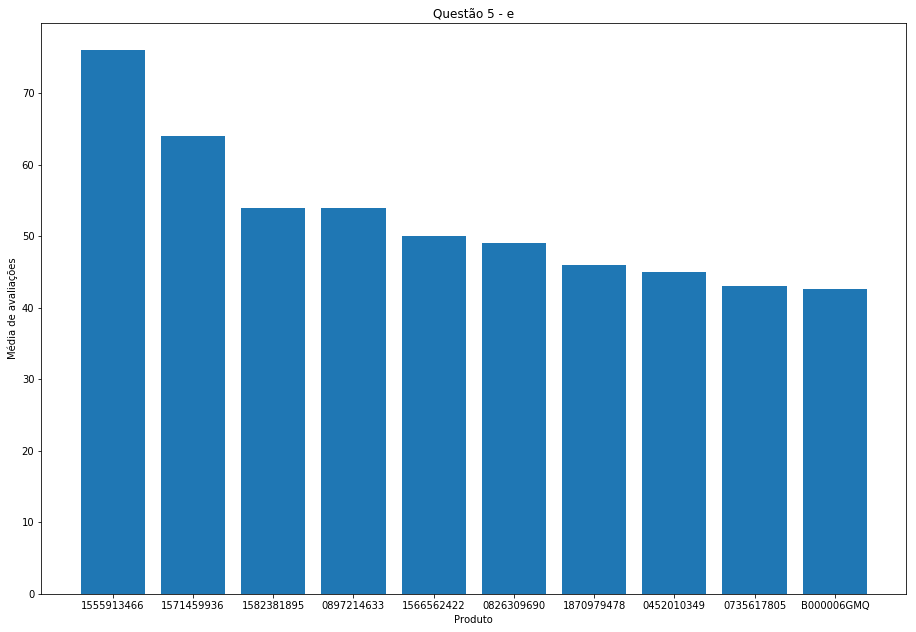

In [167]:
#5 e)
con = create_connection(user,password,host,port,dbname)
result = getTop10ProductsWithMostRatingAVG(con)

axis = np.array([([x[0],x[2]]) for x in result])
x = [x[0] for x in axis]
y = [y[1] for y in axis]
plt.xlabel("Produto")
plt.ylabel("Média de avaliações")


plt.bar(x,y)
fig = plt.gcf()
# fig.savefig('images/5-d', dpi=100)
plt.title("Questão 5 - e")
fig.set_size_inches(15.5, 10.5, forward=True)
plt.show()
input("Pressiona qualquer tecla para a próxima query")

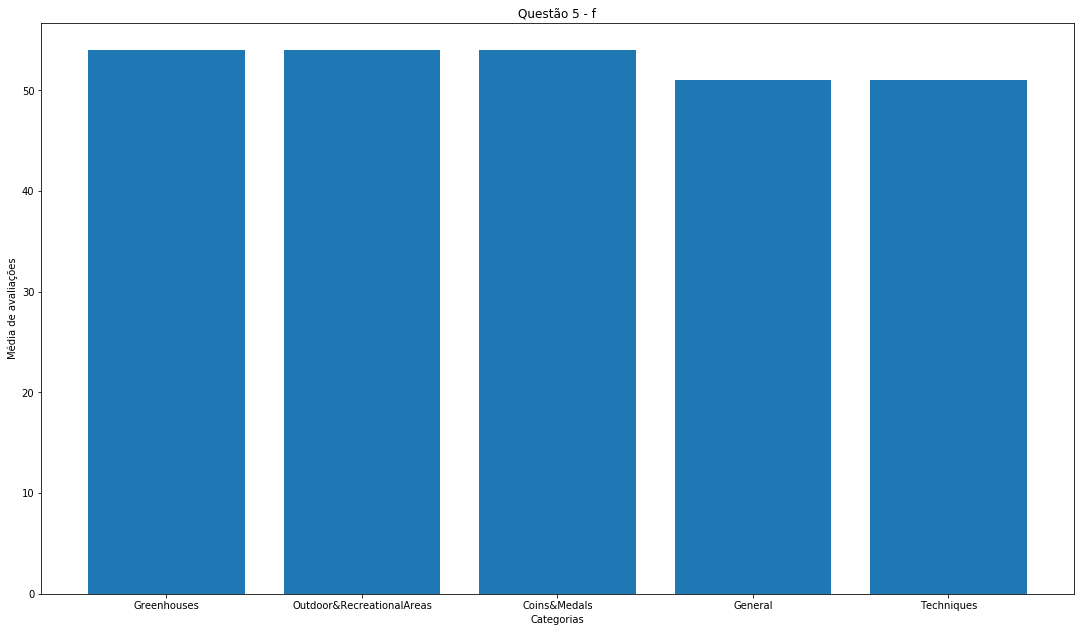

In [176]:
#5 f)
con = create_connection(user,password,host,port,dbname)
result = np.array(getTop5CategoriesWithMostRating(con))

axis = np.array([([x[1],x[2]]) for x in result])
x = [x[0] for x in axis]
y = [y[1] for y in axis]
plt.xlabel("Categorias")
plt.ylabel("Média de avaliações")
plt.title("Questão 5 - f")
plt.bar(x,y)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()
input("Pressiona qualquer tecla para a próxima query")

In [90]:
#5 g)
print("\nResultados da query 5 - g)")
con = create_connection(user,password,host,port,dbname)
result = np.array(get10CustomersWithMostReviewsForEachGroup(con))
dictClt = {}
for i in result:
    if i[1] not in dictClt:
        dictClt[i[1]] = [[i[0],i[2]]]
    else:
        dictClt[i[1]].append([i[0],i[2]])

for group in dictClt:
    print("\n10 clientes com mais comentários para {} :".format(group))
    clts = dictClt[group]
    idx = 1
    for clt in clts:
        print("    {}o: {}, comentários: {}".format(idx,clt[0],clt[1]))
        idx += 1
input("Pressiona qualquer tecla para a próxima query")


10 clientes com mais comentários para Book :
    1o: ATVPDKIKX0DER, comentários: 90
    2o: A3UN6WX5RRO2AG, comentários: 6
    3o: A2LSGO83D82U1, comentários: 4
    4o: A3FA90E7KX99JK, comentários: 4
    5o: AFVQZQ8PW0L, comentários: 3
    6o: AVEQ3PD3CGLPN, comentários: 3
    7o: A1AV32Q6I8M1LX, comentários: 3
    8o: A3IPNX3AJUY5JO, comentários: 3
    9o: A37BASUCZG1WC9, comentários: 3
    10o: A14OJS0VWMOSWO, comentários: 3

10 clientes com mais comentários para DVD :
    1o: ATVPDKIKX0DER, comentários: 10
    2o: A375OT7C8ZJCNU, comentários: 4
    3o: A20EEWWSFMZ1PN, comentários: 2
    4o: AYPCUQS6ARWFH, comentários: 2
    5o: A3UN6WX5RRO2AG, comentários: 2
    6o: AOK51PED51KHN, comentários: 2
    7o: A2NJO6YE954DBH, comentários: 2
    8o: A14QW3EMN8PBZV, comentários: 2
    9o: A3P121GNV5QYIN, comentários: 2
    10o: A26TSW6AI59ZCV, comentários: 2

10 clientes com mais comentários para Music :
    1o: ATVPDKIKX0DER, comentários: 4
    2o: A3KY46BJAF8IPK, comentários: 2
    3o: A1